title: '머신러닝2 데이터다루기'

date: '2022-06-30 09:00'


## 인공지능
인공지능>머신러닝>딥러닝

- 딥러닝 알고리즘→인공신경망 알고리즘

    - 이미지,자연어(=음성인식)

    - 판별하는 성능이 중요

- 머신러닝 알고리즘→선형회귀, 결정트리

   - 결과에 대한 해석 요구

   - 통계적 분석이 중요

   - 정형데이터(=엑셀 데이터, 테이블)

## 분석의 흐름
 1.데이터 수집

 2.데이터 가공

 3.데이터 시각화
 
 4.데이터(예측)모델링 
  - 예측평가지표
  - cf)R:,데이터(통계)모델링
  - 변수(=컬럼=피쳐)간의 관계
  - 가설 검정이 중요
  - 공통점 : 결과를 해석

5.보고서를 작성



### 모형학습
- fish_data-> 독립변수, fish_target->종속변수
- kn.fit(fish_data, fish_target) 

## 새로운 모델 제안의 위험성
-  어제 머신 러닝 공부에 이어서
- Default(내정값) : 정확도 1(100%)
- 하이퍼 파라미터 세팅
 + n_neighbprs = 49 로 했을 시 정확도 0.7(70%)
 + 튜닝을 하면 이상해질 수 있다. 따라서 완벽하게 파악하지 못한 내용을 변동시키지 말것.


## 머신러닝 알고리즘의 흐름
- 선형모델 : **선형회귀**,**로지스틱 회귀**,서포트벡터 머신
- 의사결정트리 모델 : 1975년 의사결정트리모델, KNN
 + **랜덤포레스트**
 + 부스팅계열 : **LightGBM(2017), XGBoost(2016)**
 + 추천: LightGBM

## 훈련 세트와 테스트 세트(P68)



In [250]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

- 2차원 리스트를 만들고 라벨링을 한다.

In [251]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14
print(fish_target[0:40:5])#1-40까지의 데이터에서 5간격으로 표시
print(fish_data[0:40:5])
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 0]
[[25.4, 242.0], [29.7, 450.0], [31.0, 475.0], [32.0, 600.0], [34.0, 575.0], [35.0, 725.0], [38.5, 920.0], [9.8, 6.7]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


- 전체 데이터에서 일부분 샘플을 추출했다.
- 도미35마리 빙어 14마리
- 처음 35개를 훈련/ 나머지 14개를 테스트 해본다.

In [253]:
from sklearn.neighbors import KNeighborsClassifier
# 클래스 인스턴스화
kn = KNeighborsClassifier()

# 훈련세트로 0:34를 인덱스로 활용
train_input = fish_data[:35]
train_target =fish_target[:35]

# 테스트 세트로 35:마지막까지를 인덱스로 활용
test_input = fish_data[35:]
test_target =fish_target[35:]

# 모형학습
kn = kn.fit(train_input,train_target)
print(kn.score(test_input, test_target))

0.0


-> 훈련된 데이터는 도미인데 테스트한 데이터는 빙어이기에 이상한 결과가 나옴
- 샘플링 편향
- 훈련세트와 테스트 세트가 골고루 섞이지 않음

## 샘플링 작업
- 넘파이를 사용하여 골고루 섞어 준다. 

In [254]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr[0:49:7])
print(input_arr.shape, target_arr.shape)#입력한 것의 (샘플수,특성수) 타겟은 특성수가 없음

[[ 25.4 242. ]
 [ 30.  390. ]
 [ 32.  600. ]
 [ 34.  685. ]
 [ 36.  850. ]
 [  9.8   6.7]
 [ 11.8   9.9]]
(49, 2) (49,)


In [255]:
print(target_arr.shape)
print(target_arr.ndim)#차원을 확인->1차원
print(target_arr)

(49,)
1
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [302]:
#random으로 무작위 배열을 만드는 설정
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [257]:
train_input = input_arr[index[:35]]
train_target= target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target= target_arr[index[35:]]

In [258]:
print(train_input[:1])
print(train_input[:,0])#전체길이

[[ 32. 340.]]
[32.  12.4 14.3 12.2 33.  36.  35.  35.  38.5 33.5 31.5 29.  41.  30.
 29.  29.7 11.3 11.8 13.  32.  30.7 33.  35.  41.  38.5 25.4 12.  39.5
 29.7 37.  31.  10.5 26.3 34.  26.5]


## 시각화

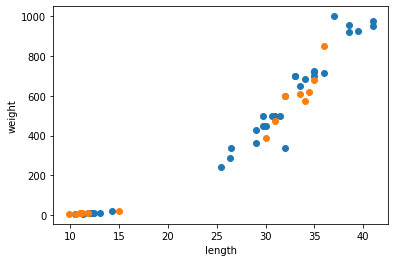

In [259]:
import matplotlib.pyplot as plt  
fig, ax = plt.subplots()
ax.scatter(train_input[:, 0], train_input[:, 1])
ax.scatter(test_input[:, 0], test_input[:, 1])
ax.set_xlabel("length")
ax.set_ylabel("weight")
fig.show()


## 두번째 머신러닝 프로그램

In [279]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [264]:
kn.predict(test_input) # 예측데이터

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [266]:
test_target #실제 데이터

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## 데이터 전처리
- 머신러닝 시 데이터 전처리
- 결측치 처리, 이상치 처리

In [268]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [270]:
## column_stack()활용
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [272]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

fish_data.shape

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


(49, 2)

- 종속변수 = Y = 타깃데이터 = Target <->독립변수(X)

In [274]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
print(fish_target.shape)

(49,)


## scikit-learn 훈련세트와 테스트 세트 나누기 

In [276]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    #독립변수, 종속변수
    fish_data, fish_target, random_state =42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((36, 2), (13, 2), (36,), (13,))

- P92 도미와 빙어가 잘 섞여 있나? 

In [278]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


- 35(도미) :14(빙어)
 + 2.5:1
- 테스트 셋(비율)
 + 3.3:1


## 층화샘플링
- 기초 통계, 설문조사
- 비율이 중요
- 예)남성 속옷을 구매하는 비율은 남자9: 여자1이지만 조사는 남자5: 여자 5로 조사됨으로 비율이 맞지 않음



In [280]:
train_input, test_input, train_target, test_target = train_test_split(
    # 독립변수, 종속변수
    fish_data, fish_target, stratify=fish_target, random_state = 42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((36, 2), (13, 2), (36,), (13,))

- stratify = fish_target를 넣어주어
- 빙어가 한마리 더 늘도록 해서 테스트 세트 비율이 2.55:1 로 근접하게 됨

In [303]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한마리
-


In [289]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

- 도미사이즈 20cm 이상 = 1
- 빙어사이즈 10cm 이하 = 0 인 문제가 발생
- 알고리즘에 문제가 있음

In [290]:
print(kn.predict([[25,150]]))

[0.]


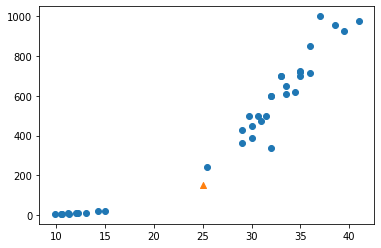

In [291]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
ax.scatter(train_input[:, 0], train_input[:, 1])
ax.scatter(25, 150, marker = '^')
plt.show()

- 이웃 샘플이 누구인지 확인해보니 알고리즘이 맞지 않음
 + 빙어에 4개의 이웃 샘플이 있어 빙어로 인식

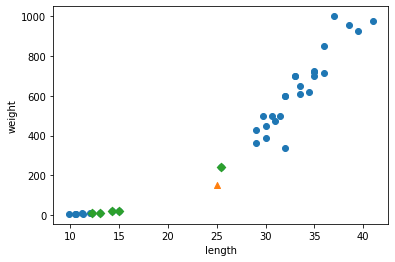

In [292]:
distances, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 떨어진 거리 비율을 맞추기 위해 스케일의 크기를 동일하게 함.즉 무게와 길이의 길이를 1000으로 맞춤

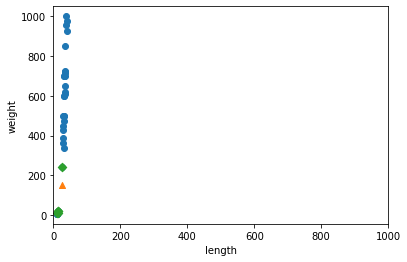

In [293]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

-p98
- 그러나 두 특성(길이와 무게)의 값이 놓인 범위가 매우 다름
- 두 특성의 스케일이 다름
 + 스케일이 같도록 통계처리 필요
 + Feature Engineering(피처 엔지니어링)
- 머신 러닝
 + 전체 데이터 전처리(결측지 처리, 이상치 처리)
 + 데이터 분리
 + Feature Engineering(피처 엔지니어링)

### 표준점수
- z 점수


In [294]:
mean = np.mean(train_input, axis =0)
std = np.std(train_input,axis=0)

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


- 표준 점수 구하기 

In [295]:
# 브로드 캐스팅- 서로 다른 배열을 계산할 때
print(train_input.shape, mean.shape, std.shape)
train_scaled = (train_input - mean)/std

(36, 2) (2,) (2,)


In [284]:
train_input[0:5]

array([[ 29.7, 500. ],
       [ 12.2,  12.2],
       [ 33. , 700. ],
       [ 11.3,   8.7],
       [ 39.5, 925. ]])

In [296]:
train_scaled[0:5]

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528]])

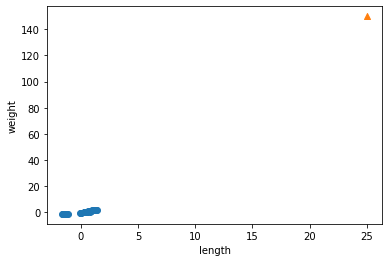

In [245]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

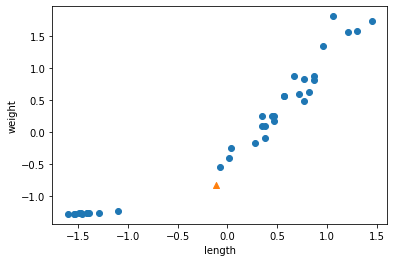

In [287]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

통계처리 전 : KNN --> 예측이 틀림
통계처리 후 : KNN --> 예측이 정확하게 맞음
-- 통계처리 --> Feature Engineering

- 모형학습

In [297]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [298]:
#kn.score(test_input, test_target)
test_scaled = (test_input - mean)/ std
kn.score(test_scaled, test_target)

1.0

- 예측

In [301]:
print(kn.predict([new]))

[1.]


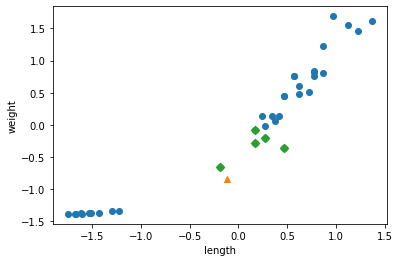

In [299]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()